Prepare the dataset and train a model on the data.

In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

In [2]:
from examples.mia.tabular_mia.utils.adult_data_preparation import preprocess_adult_dataset, get_adult_dataloaders, download_adult_dataset
from examples.mia.tabular_mia.utils.adult_model_preparation import AdultNet, create_trained_model_and_metadata

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")
download_adult_dataset(path)
dataset = preprocess_adult_dataset(path)
train_loader, test_loader = get_adult_dataloaders(dataset, train_fraction=0.3, test_fraction=0.3)

# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
model = AdultNet(input_size=dataset.x.shape[1], hidden_size=64, num_classes=1)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
                                                                               train_loader, 
                                                                               test_loader, 
                                                                               epochs=100
                                                                               )

Directory already exists: /home/johan/project/LeakPro/examples/mia/tabular_mia/data/


Training Progress: 100%|██████████| 100/100 [00:32<00:00,  3.12it/s]


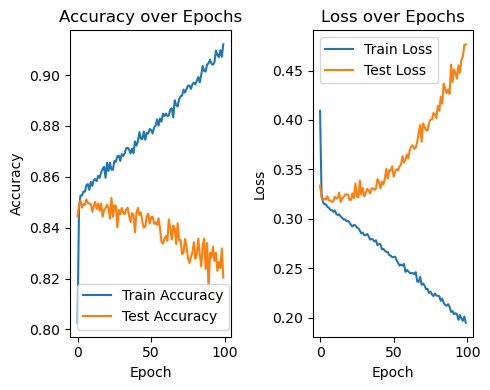

In [3]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Create LeakPro objects and run attack

In [2]:
from adult_handler import AdultInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(AdultInputHandler, config_path)

# Run the audit 
leakpro.run_audit()


2024-09-16 20:42:23,721 INFO     Target model blueprint created from AdultNet in utils/adult_model_preparation.py.
2024-09-16 20:42:23,725 INFO     Loaded target model metadata from ./target/model_metadata.pkl
2024-09-16 20:42:23,730 INFO     Loaded target model from ./target
2024-09-16 20:42:23,776 INFO     Loaded population dataset from ./data/adult_data.pkl
2024-09-16 20:42:23,778 INFO     Loaded population dataset from ./data/adult_data.pkl
2024-09-16 20:42:23,779 INFO     Data contains 8 categorical columns and 6 continuous columns.
2024-09-16 20:42:23,780 INFO     Data is one-hot encoded: True
2024-09-16 20:42:23,781 INFO     Creating shadow model handler singleton
2024-09-16 20:42:23,783 INFO     Creating distillation model handler singleton
2024-09-16 20:42:23,786 INFO     Configuring RMIA attack
2024-09-16 20:42:23,787 INFO     Added attack: rmia
2024-09-16 20:42:23,788 INFO     Configuring the QMIA attack


RuntimeError: stack expects each tensor to be equal size, but got [1, 104] at entry 0 and [1] at entry 1